# Flight Price Prediction
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [2]:
train_data = pd.read_excel(r"F:\SELF STUDY\PROJECT\dataset\Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,GoAir,2021-05-11,Delhi,Cochin,DEL → BOM → COK,07:00,12:55,5h 55m,1 stop,No info,7652
1,Vistara,2021-01-12,Banglore,Delhi,BLR → DEL,09:45,12:35,2h 50m,non-stop,No info,4668
2,Vistara,2021-01-15,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687
3,Vistara,2021-06-26,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3187
4,Air India,2021-05-02,Kolkata,Banglore,CCU → GAU → DEL → BLR,09:50,23:15,13h 25m,2 stops,No info,13727


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10421 entries, 0 to 10420
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10421 non-null  object        
 1   Date_of_Journey  10421 non-null  datetime64[ns]
 2   Source           10421 non-null  object        
 3   Destination      10421 non-null  object        
 4   Route            10420 non-null  object        
 5   Dep_Time         10421 non-null  object        
 6   Arrival_Time     10421 non-null  object        
 7   Duration         10421 non-null  object        
 8   Total_Stops      10420 non-null  object        
 9   Additional_Info  10421 non-null  object        
 10  Price            10421 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 895.7+ KB


In [6]:
train_data["Duration"].value_counts()

2h 50m     541
1h 30m     384
2h 45m     326
2h 55m     322
2h 35m     320
          ... 
33h 45m      1
30h 10m      1
31h 30m      1
42h 5m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [7]:
train_data.dropna(inplace = True) #dropping nan values

<AxesSubplot:>

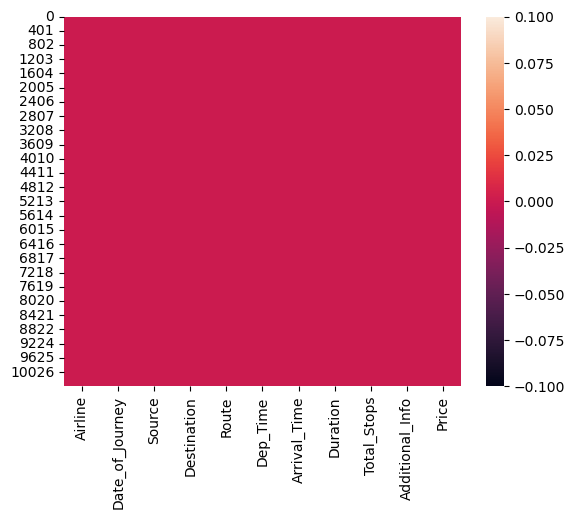

In [8]:
sns.heatmap(train_data.isnull())

# no null values 

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

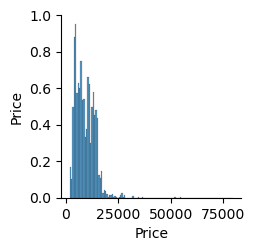

In [10]:
sns.pairplot(train_data)

---

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

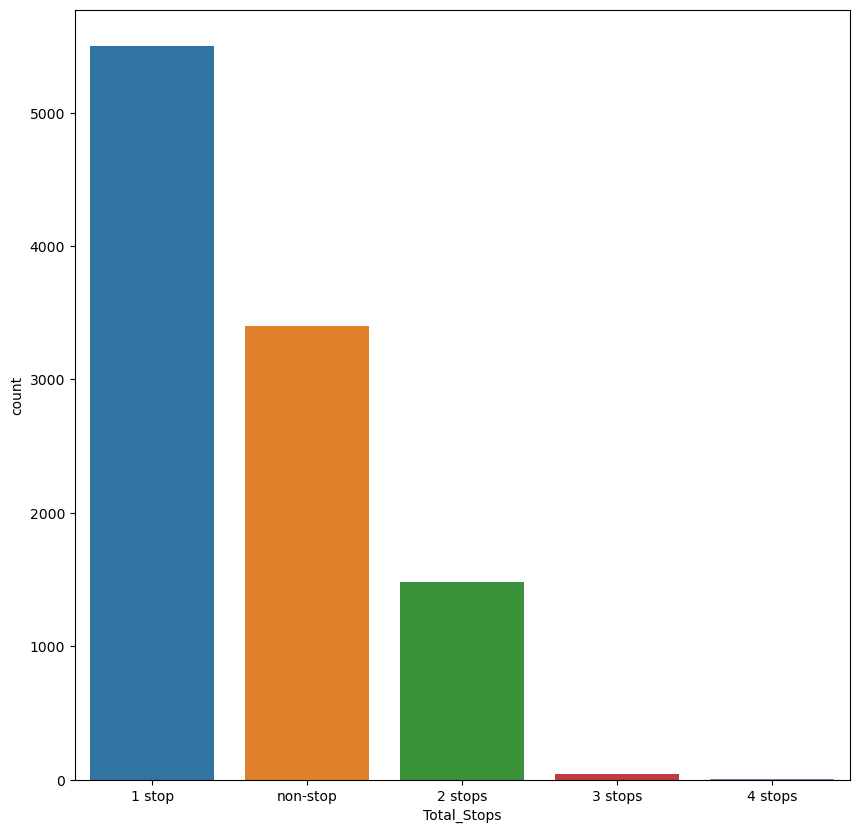

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(x='Total_Stops',data=train_data)

## we can see that Total stops = 1 are more

In [12]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [13]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

<AxesSubplot:xlabel='Airline', ylabel='count'>

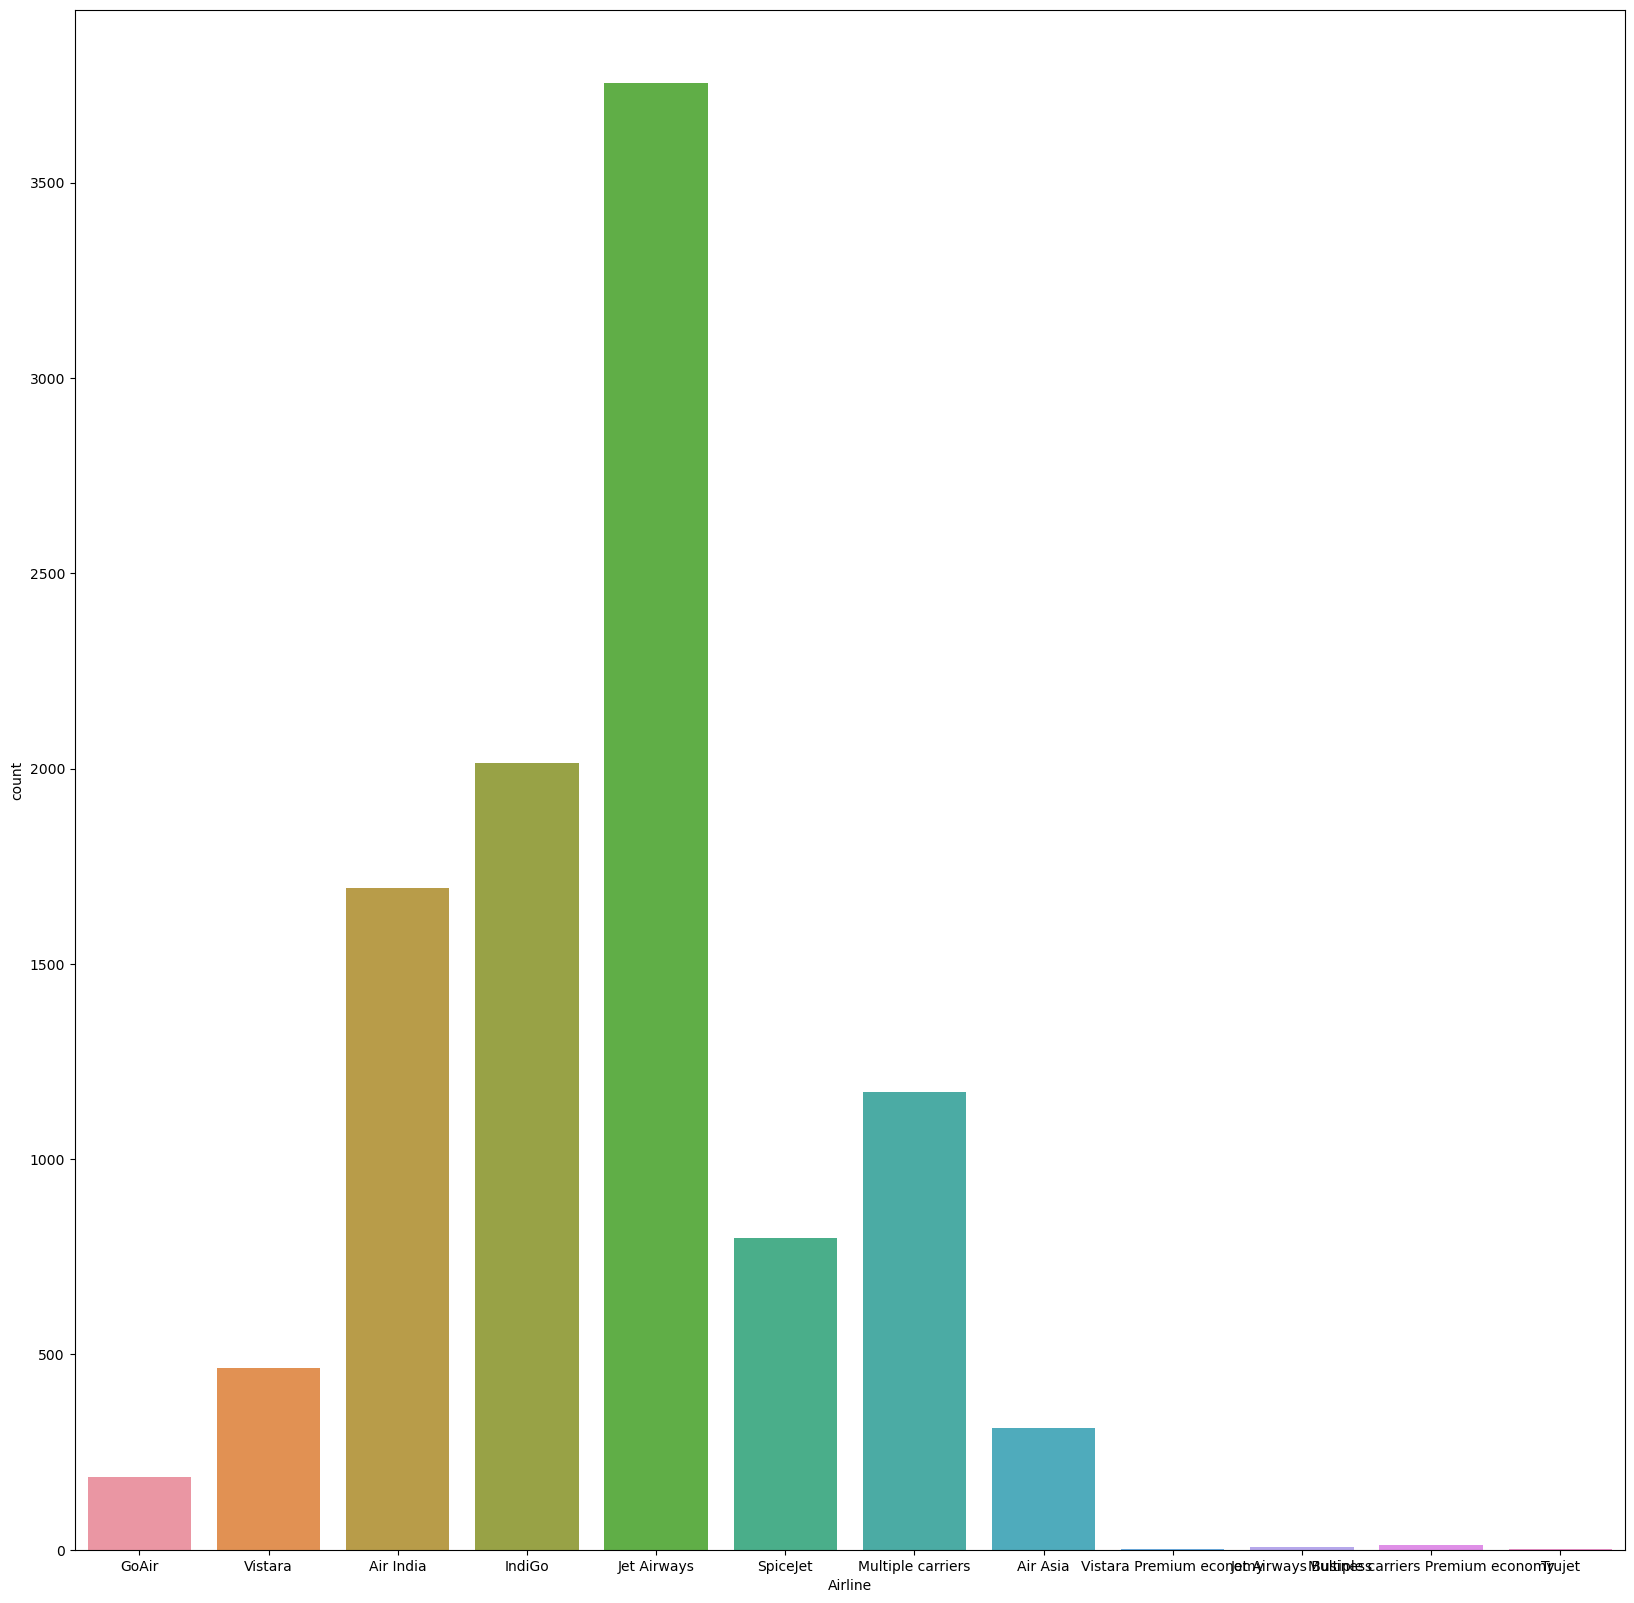

In [14]:
plt.figure(figsize=(20,20))
sns.countplot(x='Airline',data=train_data)

## Jet airways has more passengers 

In [15]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,GoAir,2021-05-11,Delhi,Cochin,DEL → BOM → COK,07:00,12:55,5h 55m,1 stop,No info,7652,11,5
1,Vistara,2021-01-12,Banglore,Delhi,BLR → DEL,09:45,12:35,2h 50m,non-stop,No info,4668,12,1
2,Vistara,2021-01-15,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687,15,1
3,Vistara,2021-06-26,Chennai,Kolkata,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3187,26,6
4,Air India,2021-05-02,Kolkata,Banglore,CCU → GAU → DEL → BLR,09:50,23:15,13h 25m,2 stops,No info,13727,2,5


In [16]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

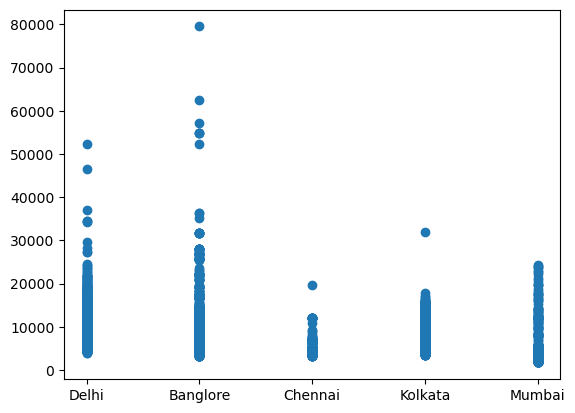

In [17]:
plt.scatter(train_data['Source'],train_data['Price'])
plt.show()

In [18]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
#pd.to_datetime will convert the dep_time into datetime col 
# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [19]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,GoAir,Delhi,Cochin,DEL → BOM → COK,12:55,5h 55m,1 stop,No info,7652,11,5,7,0
1,Vistara,Banglore,Delhi,BLR → DEL,12:35,2h 50m,non-stop,No info,4668,12,1,9,45
2,Vistara,Chennai,Kolkata,MAA → CCU,09:20,2h 15m,non-stop,No info,3687,15,1,7,5
3,Vistara,Chennai,Kolkata,MAA → CCU,09:20,2h 15m,non-stop,No info,3187,26,6,7,5
4,Air India,Kolkata,Banglore,CCU → GAU → DEL → BLR,23:15,13h 25m,2 stops,No info,13727,2,5,9,50


In [20]:
#pd.to_datetime will convert the arrival_time into datetime col
# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

<AxesSubplot:xlabel='Price', ylabel='count'>

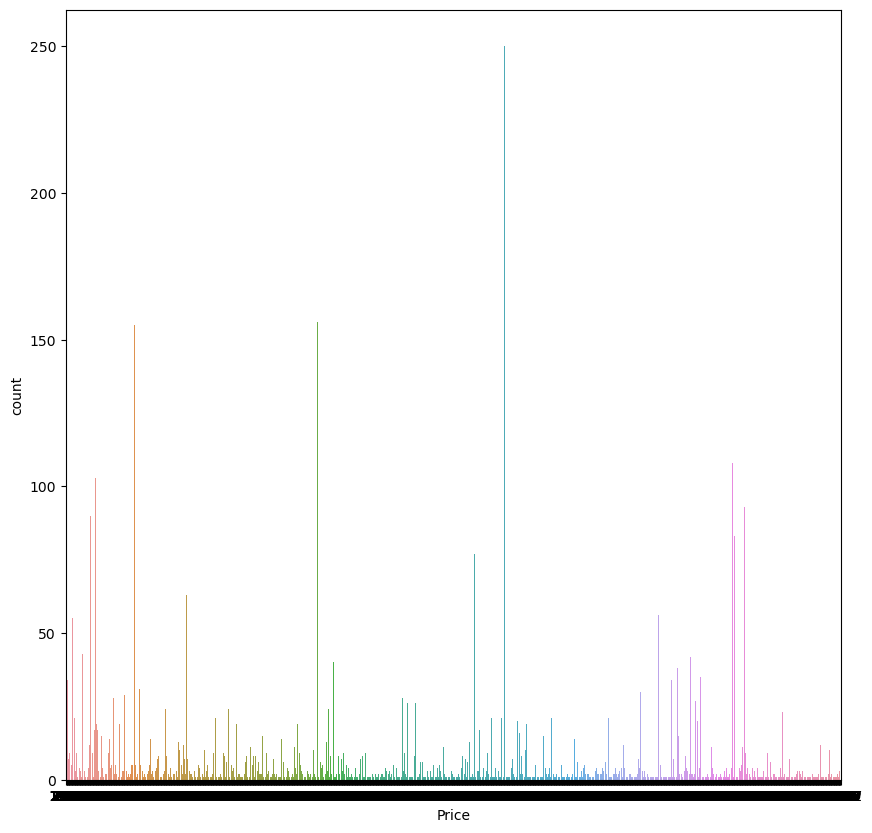

In [21]:
plt.figure(figsize=(10,10))
sns.countplot(x='Price',data=train_data)

<AxesSubplot:>

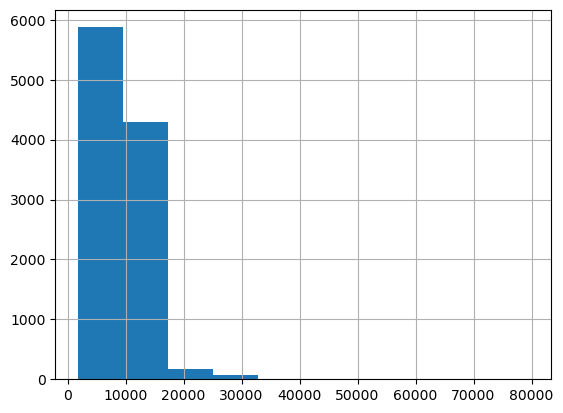

In [22]:
train_data["Price"].hist()

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,GoAir,Delhi,Cochin,DEL → BOM → COK,5h 55m,1 stop,No info,7652,11,5,7,0,12,55
1,Vistara,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,4668,12,1,9,45,12,35
2,Vistara,Chennai,Kolkata,MAA → CCU,2h 15m,non-stop,No info,3687,15,1,7,5,9,20
3,Vistara,Chennai,Kolkata,MAA → CCU,2h 15m,non-stop,No info,3187,26,6,7,5,9,20
4,Air India,Kolkata,Banglore,CCU → GAU → DEL → BLR,13h 25m,2 stops,No info,13727,2,5,9,50,23,15


In [24]:
# Time taken by plane to reach destination is called Duration
# It is the difference betwwen Departure Time and Arrival time

# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [25]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

<AxesSubplot:>

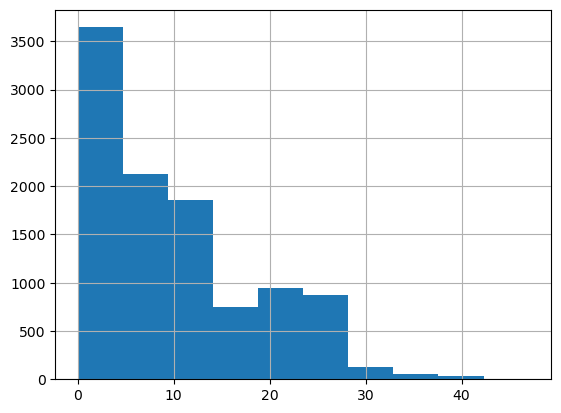

In [26]:
train_data["Duration_hours"].hist()

In [27]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,GoAir,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,7652,11,5,7,0,12,55,5,55
1,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No info,4668,12,1,9,45,12,35,2,50
2,Vistara,Chennai,Kolkata,MAA → CCU,non-stop,No info,3687,15,1,7,5,9,20,2,15
3,Vistara,Chennai,Kolkata,MAA → CCU,non-stop,No info,3187,26,6,7,5,9,20,2,15
4,Air India,Kolkata,Banglore,CCU → GAU → DEL → BLR,2 stops,No info,13727,2,5,9,50,23,15,13,25


---

In [29]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0


In [30]:
train_data["Airline"].value_counts()

Jet Airways                          3755
IndiGo                               2014
Air India                            1695
Multiple carriers                    1172
SpiceJet                              797
Vistara                               465
Air Asia                              312
GoAir                                 187
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

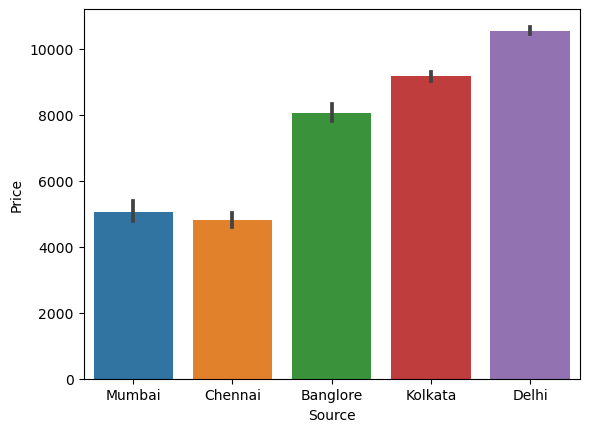

In [31]:
# Source vs Price
sns.barplot(y="Price",x="Source",data=train_data.sort_values("Price"))

In [32]:
train_data["Source"].value_counts()

Delhi       4425
Kolkata     2806
Banglore    2128
Mumbai       686
Chennai      375
Name: Source, dtype: int64

In [33]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0


In [34]:
train_data["Destination"].value_counts()

Cochin       4425
Banglore     2806
Delhi        1225
New Delhi     903
Hyderabad     686
Kolkata       375
Name: Destination, dtype: int64

In [35]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,0,0


In [36]:
train_data["Route"]

0              DEL → BOM → COK
1                    BLR → DEL
2                    MAA → CCU
3                    MAA → CCU
4        CCU → GAU → DEL → BLR
                 ...          
10416    CCU → JAI → BOM → BLR
10417          DEL → BOM → COK
10418          DEL → BOM → COK
10419          DEL → BOM → COK
10420    DEL → IDR → BOM → COK
Name: Route, Length: 10420, dtype: object

In [37]:
# Route and Total_Stops are related to each other
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [38]:
train_data["Total_Stops"].value_counts()

1 stop      5498
non-stop    3397
2 stops     1479
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [39]:
# Ordinal Categorical type we perform LabelEncoder
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [40]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,GoAir,Delhi,Cochin,1,7652,11,5,7,0,12,55,5,55
1,Vistara,Banglore,Delhi,0,4668,12,1,9,45,12,35,2,50
2,Vistara,Chennai,Kolkata,0,3687,15,1,7,5,9,20,2,15
3,Vistara,Chennai,Kolkata,0,3187,26,6,7,5,9,20,2,15
4,Air India,Kolkata,Banglore,2,13727,2,5,9,50,23,15,13,25


In [41]:
# Concatenate df --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [42]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,GoAir,Delhi,Cochin,1,7652,11,5,7,0,12,55,5,55,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,Vistara,Banglore,Delhi,0,4668,12,1,9,45,12,35,2,50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,Vistara,Chennai,Kolkata,0,3687,15,1,7,5,9,20,2,15,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
3,Vistara,Chennai,Kolkata,0,3187,26,6,7,5,9,20,2,15,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
4,Air India,Kolkata,Banglore,2,13727,2,5,9,50,23,15,13,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [43]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [44]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,7652,11,5,7,0,12,55,5,55,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,4668,12,1,9,45,12,35,2,50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,3687,15,1,7,5,9,20,2,15,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
3,0,3187,26,6,7,5,9,20,2,15,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
4,2,13727,2,5,9,50,23,15,13,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [45]:
data_train.shape

(10420, 30)

---

## Test set

In [46]:
test_data = pd.read_excel(r"F:\SELF STUDY\PROJECT\dataset\Test_set.xlsx")

In [47]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2021-04-05,Kolkata,Banglore,CCU → BOM → BLR,18:55,22:35 02 Apr,27h 40m,1 stop,No info
1,Multiple carriers,2021-06-02,Delhi,Cochin,DEL → BOM → COK,07:30,21:00,13h 30m,1 stop,No info
2,Air India,2021-05-22,Kolkata,Banglore,CCU → BOM → COK → BLR,09:25,13:45 13 May,28h 20m,2 stops,No info
3,Jet Airways,2021-04-02,Kolkata,Banglore,CCU → BOM → BLR,14:05,19:50,5h 45m,1 stop,In-flight meal not included
4,Jet Airways,2021-03-24,Kolkata,Banglore,CCU → BOM → BLR,13:55,16:20 25 Mar,26h 25m,1 stop,No info


In [48]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554 entries, 0 to 2553
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          2554 non-null   object        
 1   Date_of_Journey  2554 non-null   datetime64[ns]
 2   Source           2554 non-null   object        
 3   Destination      2554 non-null   object        
 4   Route            2554 non-null   object        
 5   Dep_Time         2554 non-null   object        
 6   Arrival_Time     2554 non-null   object        
 7   Duration         2554 non-null   object        
 8   Total_Stops      2554 non-null   object        
 9   Additional_Info  2554 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 199.7+ KB
None


In [49]:
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [50]:
# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [51]:
# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [52]:
# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

In [53]:
# Categorical data

print("*******Airline")
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)


print("*******Source")
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)


print("*******Destination")
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

*******Airline
Jet Airways                          854
IndiGo                               496
Air India                            423
Multiple carriers                    324
SpiceJet                             194
Vistara                              127
Air Asia                              84
GoAir                                 45
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
*******Source
Delhi       1092
Kolkata      676
Banglore     539
Mumbai       174
Chennai       73
Name: Source, dtype: int64
*******Destination
Cochin       1092
Banglore      676
Delhi         313
New Delhi     226
Hyderabad     174
Kolkata        73
Name: Destination, dtype: int64


In [54]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


print("Shape of test data : ", data_test.shape)

Shape of test data :  (2554, 28)


In [55]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,5,4,18,55,22,35,27,40,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,2,6,7,30,21,0,13,30,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
2,2,22,5,9,25,13,45,28,20,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,2,4,14,5,19,50,5,45,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,24,3,13,55,16,20,26,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


---

 Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,




In [56]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [57]:
data_train.shape

(10420, 30)

In [58]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,11,5,7,0,12,55,5,55,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,12,1,9,45,12,35,2,50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,0,15,1,7,5,9,20,2,15,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
3,0,26,6,7,5,9,20,2,15,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
4,2,2,5,9,50,23,15,13,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [59]:
y = data_train.iloc[:, 1]
y.head()

0     7652
1     4668
2     3687
3     3187
4    13727
Name: Price, dtype: int64

In [60]:
# Important feature using ExtraTreesRegressor
# ExtraTreesRegressor helps you to find feature importance 
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

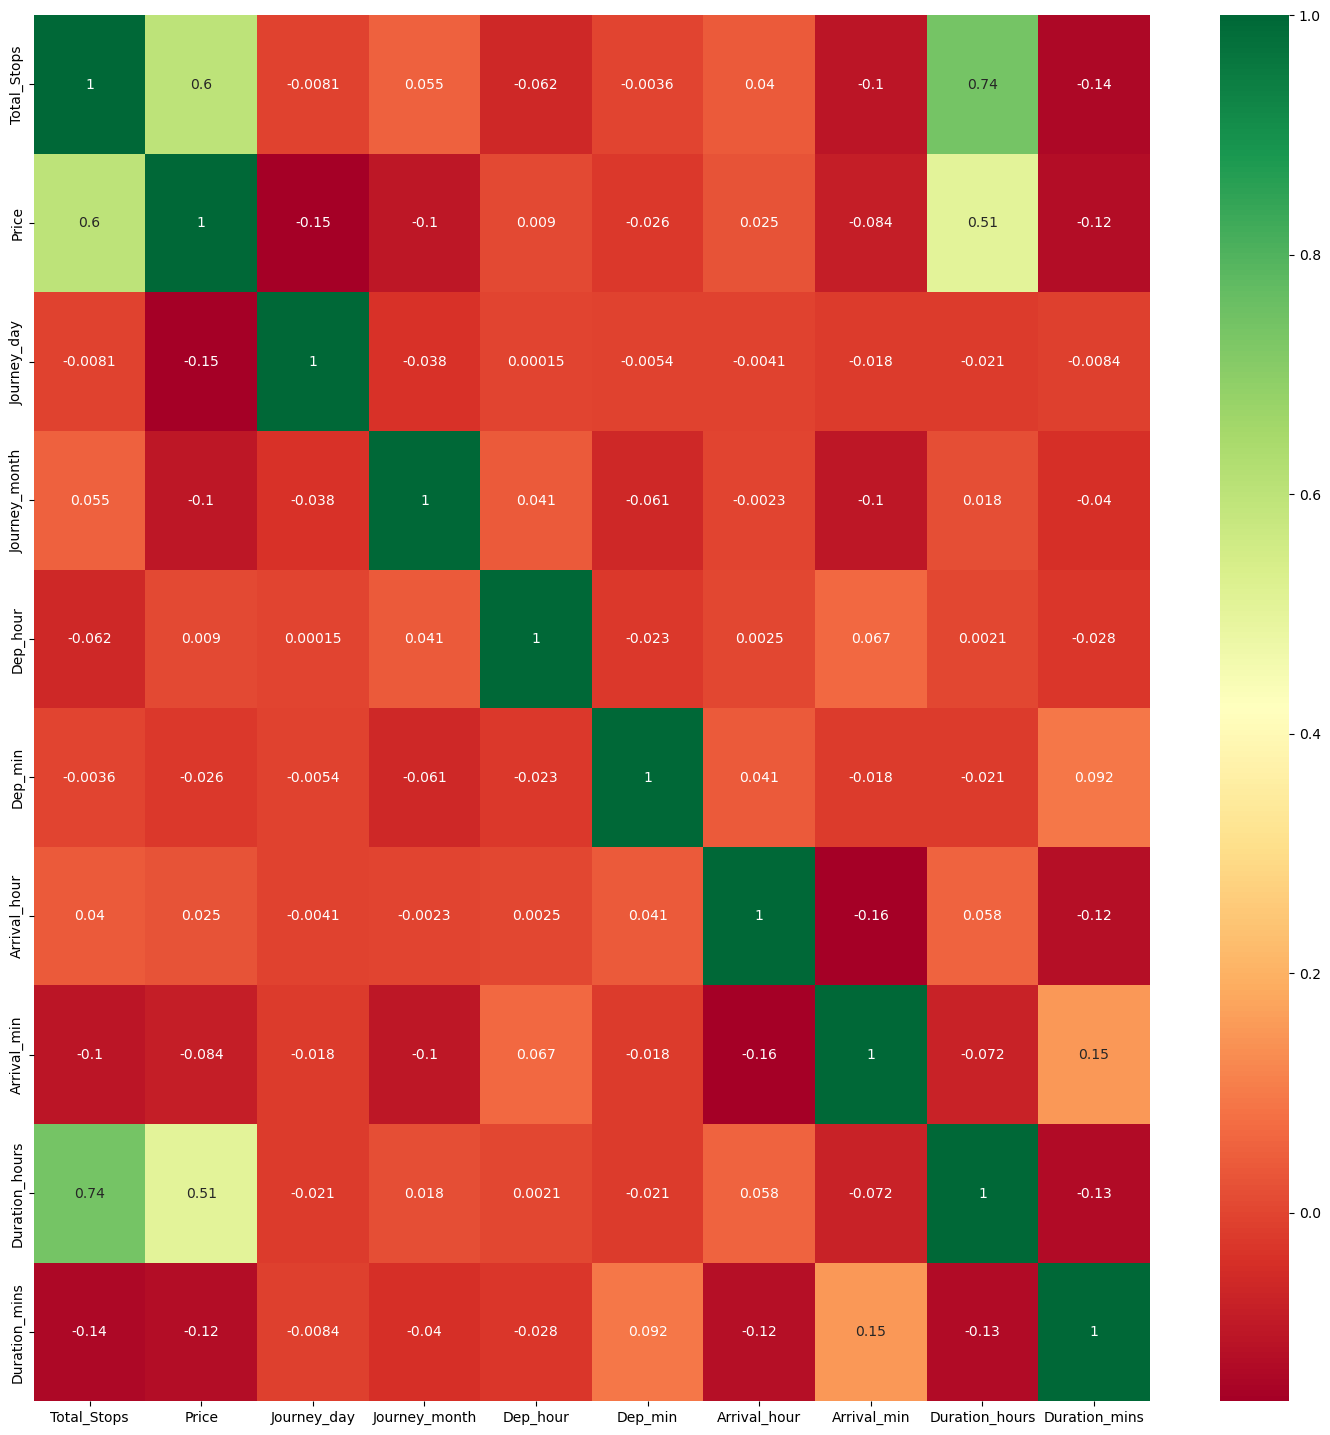

In [61]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [62]:
print(selection.feature_importances_)

[2.41376265e-01 1.44075897e-01 5.31820237e-02 2.42563413e-02
 2.09936471e-02 2.77011416e-02 1.91907696e-02 1.08322302e-01
 1.70200332e-02 1.07793089e-02 1.69708608e-03 1.49800266e-02
 1.39597730e-01 6.82794725e-02 2.15507128e-02 9.15603311e-04
 2.93513904e-03 1.15987112e-04 5.21835475e-03 9.62990495e-05
 5.19374763e-04 9.93659372e-03 3.33265967e-03 6.67335233e-03
 1.09797512e-02 1.35784733e-02 7.18313166e-03 4.46653508e-04
 2.50658686e-02]


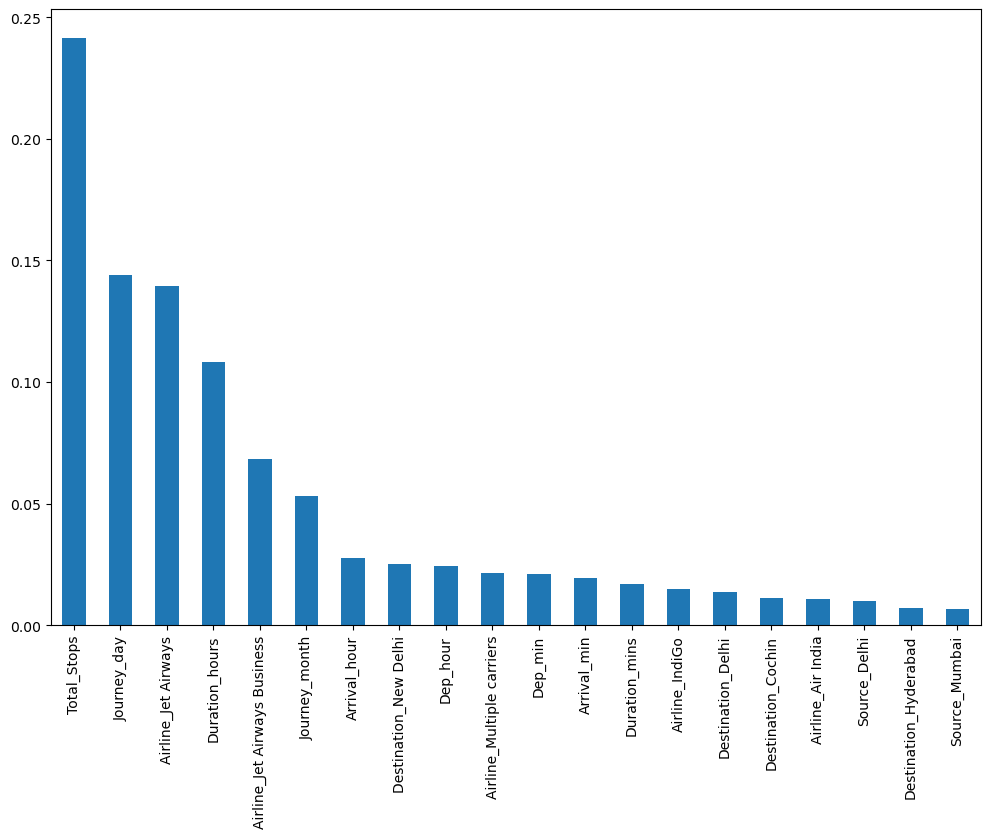

In [63]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='bar')
plt.show()


---

Random Forest Regressor



In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 69)

In [65]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [66]:
y_pred = reg_rf.predict(X_test)

In [67]:
reg_rf.score(X_train, y_train)

0.9573189129868215

In [68]:
reg_rf.score(X_test, y_test)

0.8060296006491707

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_2360\766066729.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


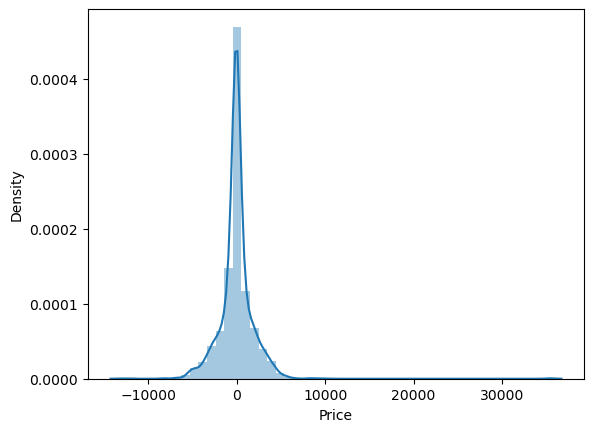

In [69]:
sns.distplot(y_test-y_pred)
plt.show()
#gaussian distribution 

In [70]:
from sklearn import metrics

In [71]:
print('Mean absolute error :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute error : 1148.829365351832
Mean Squared Error : 3901454.5631795707
Root Mean Squared Error : 1975.2100048297575


In [72]:
metrics.r2_score(y_test, y_pred)

0.8060296006491707

In [73]:
# linear Regression

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [75]:
X_t,X_te,Y_t,Y_te=train_test_split(X,y,test_size=0.4,random_state=69)

In [76]:
model=LinearRegression()
model.fit(X_t,Y_t)

LinearRegression()

In [77]:
y_p=model.predict(X_te)

In [78]:
y_p

array([ 6269.16911634,  3932.9161771 ,  5987.28250465, ...,
       11201.14311334, 10296.47763282,  4396.62629598])

In [79]:
y_p.shape

(4168,)

In [80]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

training_data_accuracy = mean_squared_error(y_p, Y_te)
training_data_accuracy

8036571.053058516

In [81]:
model.score(X_te,Y_te)

0.604880316312824

#### as Linear regreesion is not giving a good accuracy we will go with random forest regressor 

---

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [84]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [85]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 8, cv = 5, verbose=2, random_state=69, n_jobs = 1)

In [86]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   6.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   6.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimat

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=8, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=69, scoring='neg_mean_squared_error',
                   verbose=2)

In [87]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [88]:
prediction = rf_random.predict(X_test)

C:\Users\VAIBHAV\AppData\Local\Temp\ipykernel_2360\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


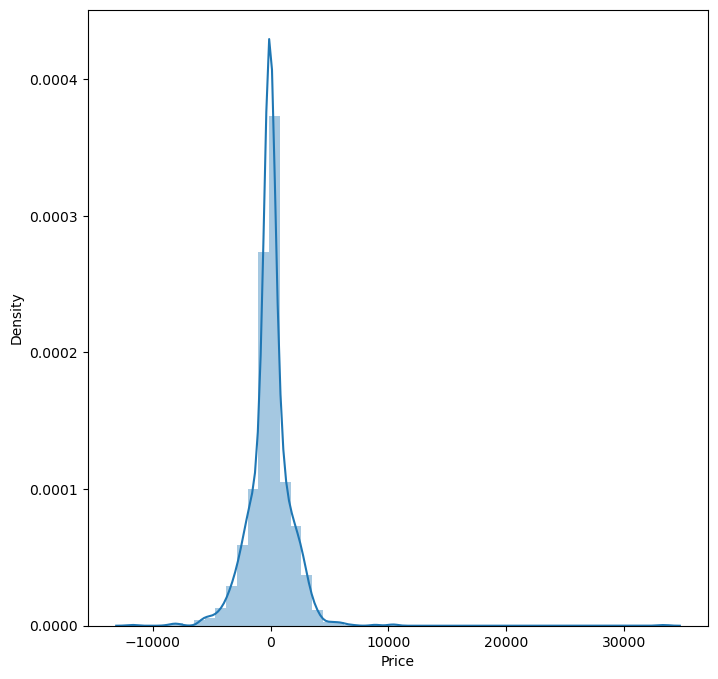

In [89]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [90]:
print('Mean absolute error :', metrics.mean_absolute_error(y_test, prediction))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, prediction))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean absolute error : 1123.6989118618683
Mean Squared Error : 3522515.2552046026
Root Mean Squared Error : 1876.8365019906776


---

In [91]:
import pickle
file = open('flight_rf.pkl', 'wb')
pickle.dump(rf_random, file)

In [92]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [93]:
y_prediction = forest.predict(X_test)

In [94]:
metrics.r2_score(y_test, y_prediction)

0.8248694993862532

---